# Information Theory 信息论

Name: [刘港莹]

本次作业的目的是检查你是否了解了自信息, 信息熵和KL散度的计算, 并且学会使用. 你需要补充的代码由###来代替.

In [42]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Self-information 自信息

In [1]:
def self_information(p):
    """
    Function: Calculate the self-information of event
    Input:
              p:      The probability of event p(x), type: float
    Output:   
              return: The self-information of event
    """
    if p>1 or p<0:
        print("Error: Your input is not a probability of event!")
        return(0)  
    
    # Your code
    # Here you should calculate the self-information of event.
    return -np.log(p,2) # my code
            # math.log(1/p,2) # 这种写法会产生计算误差

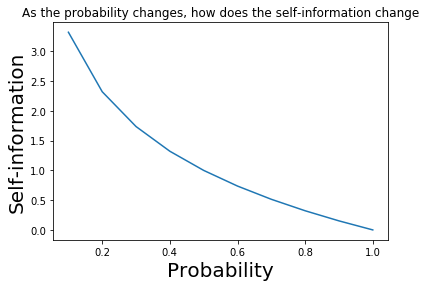

In [44]:
# As the probability of event changes, how does the self-information change
I = np.zeros(10)
for i in range(0, 10):
    p = 0.1*i+0.1
    I[i] = self_information(p)
plt.plot(np.arange(0.1, 1.1, 0.1), I)
plt.title("As the probability changes, how does the self-information change")
plt.xlabel("Probability", fontsize=20)
plt.ylabel("Self-information", fontsize=20)
plt.show()

# Entopy 信息熵

In [53]:
def entropy(P):
    """
    Function: Calculate the entopy of random variable
    Input:
              P:      The probability mass function(pmf) of random variable P, type: list or numpy.ndarray
    Output:   
              return: The entopy of random variable
    """
    P = np.array(P)
    
    # Determine whether the input is a probability distribution
    if P.sum()!=1 or P.max()>1 or P.min()<0:
        print("Error: Your input is not a pmf!")
        return(0)  
    
    # Your code
    # Here, you should calculate the entopy of random variable
    return -np.sum(P*np.log2(P))

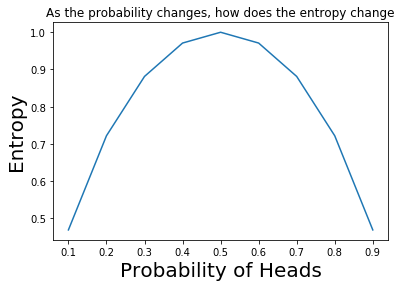

If the coin is normal, the entopy is 1.00
If the coin is unnormal, the entopy is 0.08


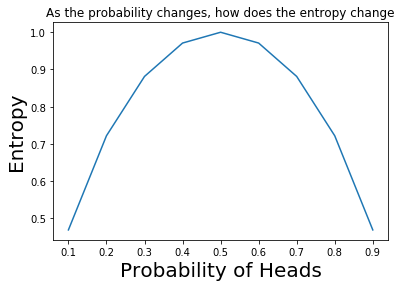

If the dice is normal, the entopy is 0.65
If the dice is unnormal, the entopy is 0.08


In [54]:
# As the probability changes, how does the entropy change
p_entropy = np.zeros(9)
for i in range(1, 10):
    p = 0.1*i
    p_entropy[i-1] = entropy(np.array( [p, 1-p] ))
plt.plot(np.arange(0.1, 1, 0.1), p_entropy)
plt.title("As the probability changes, how does the entropy change")
plt.xlabel("Probability of Heads", fontsize=20)
plt.ylabel("Entropy", fontsize=20)
plt.show()

# This is the coin example
coin_normal_p = np.array([0.5, 0.5])
coin_normal_entopy = entropy(coin_normal_p)
print("If the coin is normal, the entopy is %.2f" % (coin_normal_entopy))

coin_unnormal_p = np.array([0.01, 0.99])
coin_unnormal_entopy = entropy(coin_unnormal_p)
print("If the coin is unnormal, the entopy is %.2f" % (coin_unnormal_entopy))

#you code(optional)
# If you think of other examples, you can be supplemented
# my example
p_entropy1 = np.zeros(9)
for i in range(1, 10):
    p = 0.1*i
    p_entropy1[i-1] = entropy(np.array( [p, 1-p] ))
plt.plot(np.arange(0.1, 1, 0.1), p_entropy)
plt.title("As the probability changes, how does the entropy change")
plt.xlabel("Probability of Heads", fontsize=20)
plt.ylabel("Entropy", fontsize=20)
plt.show()
# Dice shows 1 
dice_normal_p = np.array([1/6, 5/6])
dice_normal_entopy = entropy(dice_normal_p)
print("If the dice is normal, the entopy is %.2f" % (dice_normal_entopy))

dice_unnormal_p = np.array([0.01, 0.99])
dice_unnormal_entopy = entropy(dice_unnormal_p)
print("If the dice is unnormal, the entopy is %.2f" % (dice_unnormal_entopy))

# Kullback–Leibler Divergence KL散度

In [ ]:
def KL_divergence(P, Q):
    """
    Function: Calculate the KL Divergence between two probability distributions P and Q.
    Input:
              P:      The pmf of random variable P, type: list or numpy.ndarray
              Q:      The approximate distribution of P, type: list or numpy.ndarray
    Output:   
              return: The KL Divergence between two probability distributions
    """
    P = np.array(P)
    Q = np.array(Q)
    
    # Determine whether the P and Q are the probability distribution.
    if P.sum()!=1 or P.max()>1 or P.min()<0:
        print("Error: The P is not a pmf!")
        return(0)
    if Q.sum()!=1 or Q.max()>1 or Q.min()<0:
        print("Error: The Q is not a pmf!")
        return(0)
    
    # Your code
    # Here, you should calculate the KL Divergence between two probability distributions P and Q.
    return np.sum(P*np.log2(P/Q))

In [ ]:
# This is the coin example
coin_normal_p = np.array([0.5, 0.5])

coin_unnormal_p = np.zeros([4, 2])
coin_unnormal_p[0,:] = np.array([0.01, 0.99])
coin_unnormal_p[1,:] = np.array([0.1, 0.9])
coin_unnormal_p[2,:] = np.array([0.3, 0.7])
coin_unnormal_p[3,:] = np.array([0.49, 0.51])

KL_div = np.zeros(4)

index = np.arange(2)
plt.bar(index, coin_normal_p, 0.35)
plt.ylim(0,1.1)
plt.xticks(index, ('Heads', 'Tails'))
plt.title("The normal coin.")
plt.show()

coin_type = "ABCD"
fig = plt.figure(figsize=(10.5,7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(index, coin_unnormal_p[i,:], 0.35)
    plt.ylim(0,1.1)
    plt.xticks(index, ('Heads', 'Tails'))
    plt.title("The unnormal coin " + coin_type[i])
plt.tight_layout()
plt.show()

for i in range(4):
    KL_div[i] = KL_divergence(coin_normal_p, coin_unnormal_p[i,:])
    name = "The unnormal coin " + coin_type[i]
    plt.plot(i, KL_div[i], 'o', label=name)
plt.title("The Change of KL Divergence with similarity")
plt.xlabel("The type of unnormal coin", fontsize=20)
plt.ylabel("KL Divergence", fontsize=20)
plt.legend(loc='best')
plt.show()

#you code(optional)
# If you think of other examples, you can be supplemented
## such as dice

如果你有什么疑问或者收获, 你可以在这里记录下来.

KL散度，又称相对熵。在信息论中，D（P丨丨Q）表示当用概率分布来拟合真实分布P时，产生的信息损耗，其中P是真实分布，Q是P的拟合分布。